# Data Science Project : **Group Health Insurance**

### Business Objective : **Maximize the Productivity of Employee by choosing best policy from Market** 

### Business Constraints : **Maximum Claims ratio & Minimum Sum Insured** 





# **Loading Libraries**





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading dataset**

In [ ]:
from google.colab import files
ghi = files.upload()

Saving dataset2L.xlsx to dataset2L.xlsx


In [ ]:
import io
ghi = pd.read_excel(io.BytesIO(ghi['dataset2L.xlsx']))
ghi

,Insurance Provider Name,Name of the Product,Group Size,Sum Insured,Premium Per Year,Age Group,Policy Term Per Year,Ambulance Charges,Domiciliary Hospitalization Expenses,Pre Existing Disease from day 1,Maternity Benefits,Pre-hospitalization Medical Expenses(Days),Post-hospitalization Medical Expenses(Days),Claims Ratio(%),Organ donor cover,Network Hospitals,Ayush,Dental,Newborn Baby Cover from day 1,Covid - 19
0,Aditya Birla Health Insurance Co,Group Assure COVID-19,50,200000,365582,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Not Covered,8200,Not Covered,Not Covered,Not Covered,Covered
1,Aditya Birla Health Insurance Co,Group Arogya Sanjeevani Policy,50,200000,219196,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Covered,8200,Covered,Not Covered,Covered,Not Covered
2,Acko General Insurance Co. Ltd.,Acko Group Health Insurance Policy,50,200000,396480,18 - 65,1,4000,Covered,Covered,Not Covered,30,60,95.00,Covered,5000,Not Covered,Not Covered,Covered,Not Covered
3,Bajaj Allianz General Insurance Company Limited,Health Guard (Group),50,200000,152673,18 - 65,1,1200,Not Covered,Not Covered,0 - 25000,60,90,99.80,Not Covered,10000,Not Covered,Not Covered,Not Covered,Not Covered
4,Bharati AXA,Prime Health Insurance,50,200000,222948,18 - 65,1,3500,Covered,Not Covered,Not Covered,30,60,77.50,Covered,4500,Covered,Not Covered,Not Covered,Covered
5,Care Health Insurance,Basic,50,200000,99469,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
6,Care Health Insurance,Standard,50,200000,148666,18 - 65,1,1000,Not Covered,Covered,Not Covered,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
7,Care Health Insurance,Advanced,50,200000,249748,18 - 65,1,1000,Not Covered,Covered,25000 - 50000,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
8,Cholamandalam MS General Insurance Co. Ltd.,Group Health Insurance,50,200000,283427,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,56.25,Covered,7240,Covered,Not Covered,Not Covered,Covered
9,CitiBank & The New India Assurance Co. Ltd,Good Health Insurance,50,200000,138287,18 - 65,1,1500,Not Covered,Not Covered,Not Covered,30,60,91.99,Not Covered,4000,Covered,Not Covered,Not Covered,Not Covered


## **Checking shape of the dataset**

In [ ]:
ghi.shape

(39, 20)

There are 1179 rows and 20 columns in this dataset.

# **Datatypes**

In [ ]:
ghi.dtypes

Insurance Provider Name                         object
Name of the Product                             object
Group Size                                       int64
Sum Insured                                      int64
Premium Per Year                                 int64
Age Group                                       object
Policy Term Per Year                             int64
Ambulance Charges                                int64
Domiciliary Hospitalization Expenses            object
Pre Existing Disease from day 1                 object
Maternity Benefits                              object
Pre-hospitalization Medical Expenses(Days)       int64
Post-hospitalization Medical Expenses(Days)      int64
Claims Ratio(%)                                float64
Organ donor cover                               object
Network Hospitals                                int64
Ayush                                           object
Dental                                          object
Newborn Ba

# **Checking Null Values**

In [ ]:
ghi.isnull().sum()

Insurance Provider Name                        0
Name of the Product                            0
Group Size                                     0
Sum Insured                                    0
Premium Per Year                               0
Age Group                                      0
Policy Term Per Year                           0
Ambulance Charges                              0
Domiciliary Hospitalization Expenses           0
Pre Existing Disease from day 1                0
Maternity Benefits                             0
Pre-hospitalization Medical Expenses(Days)     0
Post-hospitalization Medical Expenses(Days)    0
Claims Ratio(%)                                0
Organ donor cover                              0
Network Hospitals                              0
Ayush                                          0
Dental                                         0
Newborn Baby Cover from day 1                  0
Covid - 19                                     0
dtype: int64

No null values

# **PRE-PROCESSING**

## **Column names**

In [ ]:
ghi.columns

Index(['Insurance Provider Name', 'Name of the Product', 'Group Size',
       'Sum Insured', 'Premium Per Year ', 'Age Group', 'Policy Term Per Year',
       'Ambulance Charges', 'Domiciliary Hospitalization Expenses',
       'Pre Existing Disease from day 1 ', 'Maternity Benefits',
       'Pre-hospitalization Medical Expenses(Days)',
       'Post-hospitalization Medical Expenses(Days)', 'Claims Ratio(%)',
       'Organ donor cover', 'Network Hospitals', 'Ayush', 'Dental',
       'Newborn Baby Cover from day 1', 'Covid - 19'],
      dtype='object')

## **Renaming columns**

In [ ]:
ghi = ghi.rename(columns = {"Insurance Provider Name":"Insurance_Provider_Name",
                            "Name of the Product":"Name_of_the_Product",
                            "Group Size":"Group_Size","Sum Insured":"Sum_Insured",
                            "Premium Per Year ":"Premium_per_year","Age Group":"Age_Group",
                            "Policy Term Per Year":"Policy_Term","Ambulance Charges":"Ambulance_Charges",
                            "Domiciliary Hospitalization Expenses":"Domiciliary_Hospitalization_Expenses",
                            "Pre Existing Disease from day 1 ":"Pre_Existing_Disease_Day_1",
                            "Maternity Benefits":"Maternity_Benefits","Pre-hospitalization Medical Expenses(Days)":"Pre_hospitalization_Days",
                            "Post-hospitalization Medical Expenses(Days)":"Post_hospitalization_Days",
                            "Claims Ratio(%)":"Claims_Ratio","Organ donor cover":"Organ_donor_cover",
                            "Network Hospitals":"Network_Hospitals","Newborn Baby Cover from day 1":"Newborn_Baby_Cover_Day_1",
                            "Covid - 19":"Covid_19"})

ghi.columns

Index(['Insurance_Provider_Name', 'Name_of_the_Product', 'Group_Size',
       'Sum_Insured', 'Premium_per_year', 'Age_Group', 'Policy_Term',
       'Ambulance_Charges', 'Domiciliary_Hospitalization_Expenses',
       'Pre_Existing_Disease_Day_1', 'Maternity_Benefits',
       'Pre_hospitalization_Days', 'Post_hospitalization_Days', 'Claims_Ratio',
       'Organ_donor_cover', 'Network_Hospitals', 'Ayush', 'Dental',
       'Newborn_Baby_Cover_Day_1', 'Covid_19'],
      dtype='object')

## **Checking unique values**

In [ ]:
### Insurance_Provider_Name
len(ghi['Insurance_Provider_Name'].unique())  

27

27 Group Health Insurance providers 

In [ ]:
### Name_of_the_Product
len(ghi['Name_of_the_Product'].unique())     

31

31 Different health insurance products

In [ ]:
### Group size
ghi.Group_Size.unique()           

array([50])

One employees group size is 50

In [ ]:
### Sum_Insured
ghi.Sum_Insured.unique()

array([200000])

One sum insured of 2 lakhs

In [ ]:
### Policy_Term
pd.value_counts(ghi.Policy_Term)     

1    39
Name: Policy_Term, dtype: int64

Policy term has only one value so it is zero variance column and needs to drop

In [ ]:
### Maternity_Benefits
pd.value_counts(ghi.Maternity_Benefits)           

Not Covered      27
0 - 25000         7
25000 - 50000     5
Name: Maternity_Benefits, dtype: int64

Maternity benifts has categorized in to 3 values

In [ ]:
### Claims_Ratio
ghi.Claims_Ratio.unique()              

array([ 49.08,  95.  ,  99.8 ,  77.5 ,  95.2 ,  56.25,  91.99,  85.57,
        82.96,  93.37,  78.32,  96.33, 104.9 ,  75.45,  74.58,  91.  ,
       103.3 ,  94.4 ,  89.37,  63.55,  87.  ,  96.  ,  93.96,  78.03,
        76.68])

25 different claims %age from 27 insurance providers

In [ ]:
### Network_Hospitals
ghi.Network_Hospitals.unique()                               

array([ 8200,  5000, 10000,  4500, 15500,  7240,  4000,  2578,  5100,
        5900,  6500,  6400,  6000,  3000,  7000,  7300, 10200,  4300])

16 Unique values

## **Concatinating Insurance provider name and Name of the product**

In [ ]:
ghi['Provider_product'] = ghi[['Insurance_Provider_Name', 'Name_of_the_Product']].apply(lambda x: ' '.join(x), axis = 1)

## **Rearranging Columns : Moving Provider_product to First in dataframe**

In [ ]:
# Shift column 'Premium_per_year' to first position
first_column = ghi.pop('Provider_product')
  
# insert column to first in data frame 
ghi.insert(0, 'Provider_product', first_column)

In [ ]:
ghi.shape

(39, 21)

## **Dropping zero variance & irrelevant columns**

In [ ]:
Ghi = ghi.drop(['Insurance_Provider_Name','Name_of_the_Product','Policy_Term','Sum_Insured','Group_Size','Age_Group'],axis=1)

In [ ]:
Ghi.shape

(39, 15)

# **VISUALIZATION & EDA**



In [ ]:
Ghi.describe()

,Premium_per_year,Ambulance_Charges,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Network_Hospitals
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,243134.410256,1441.025641,31.538462,61.538462,86.749744,6764.564103
std,101074.751913,733.670638,6.703676,6.703676,13.716669,3267.100403
min,99469.000000,1000.000000,30.000000,60.000000,49.080000,2578.000000
25%,158231.000000,1000.000000,30.000000,60.000000,78.175000,4500.000000
50%,216648.000000,1000.000000,30.000000,60.000000,93.370000,6000.000000
75%,311871.500000,1750.000000,30.000000,60.000000,95.200000,7750.000000
max,458076.000000,4000.000000,60.000000,90.000000,104.900000,15500.000000


## **Univariate Analysis**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  # Remove the CWD from sys.path while we load stuff.


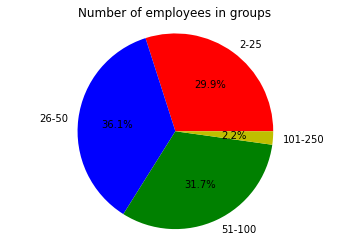

In [ ]:
# Pie chart of Group-Size
labels = ['2-25', '26-50', '51-100', '101-250']
sizes = [Ghi['Group_Size_binned'].value_counts()[1],
         Ghi['Group_Size_binned'].value_counts()[2],
         Ghi['Group_Size_binned'].value_counts()[3],
         Ghi['Group_Size_binned'].value_counts()[4]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',colors='RBGY')
ax1.axis('equal')
plt.title('Number of employees in groups')
plt.show()

Most selling Group health policy is of group size which has 26-50 employees in it.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

<Figure size 864x648 with 0 Axes>

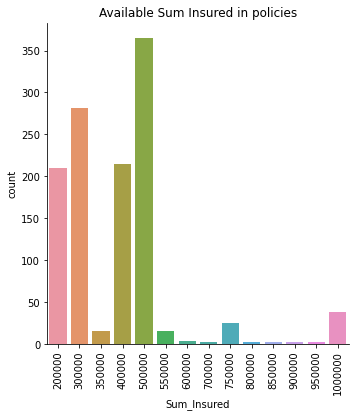

In [ ]:
plt.figure(figsize=(12,9))
sns.catplot(x="Sum_Insured", kind="count", data=Ghi)
plt.title('Available Sum Insured in policies')
plt.xticks(rotation=90)

5 lacs sum insured is most preferred.

Text(0.5, 1.0, 'Different age group of Employees')

<Figure size 864x648 with 0 Axes>

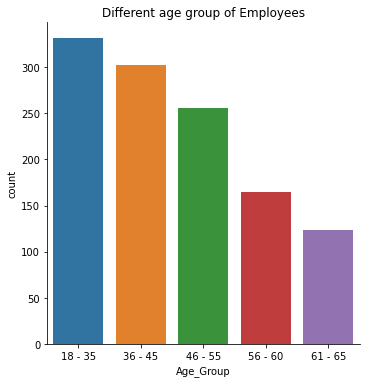

In [ ]:
plt.figure(figsize=(12,9))
sns.catplot(x="Age_Group", kind="count", data=Ghi)
plt.title('Different age group of Employees')

Most employees belong to age group of 18-35 who have group health polcies.

So based on the above graphs we can say most preferred among corporates is group size of 50 with age group of 18-35 and sum insured of 5 Lacs. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

<Figure size 864x648 with 0 Axes>

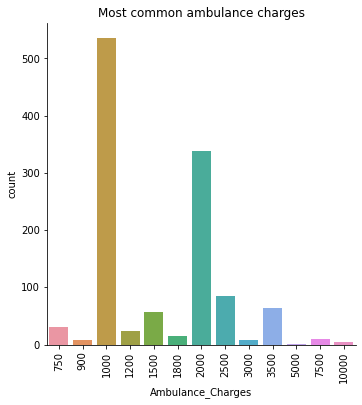

In [ ]:
plt.figure(figsize=(12,9))
sns.catplot(x="Ambulance_Charges", kind="count", data=Ghi)
plt.title('Most common ambulance charges')
plt.xticks(rotation=90)

## **Bi Variate Analysis**

Text(0.5, 1.0, 'Age_Group vs Premium_per_year')

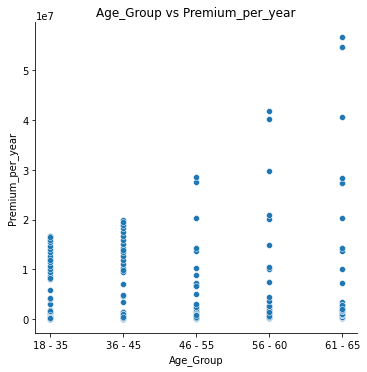

In [ ]:
sns.relplot(x='Age_Group',y='Premium_per_year',data=Ghi,palette='husl')
plt.title('Age_Group vs Premium_per_year')

As we can see premium increasing as age group increases

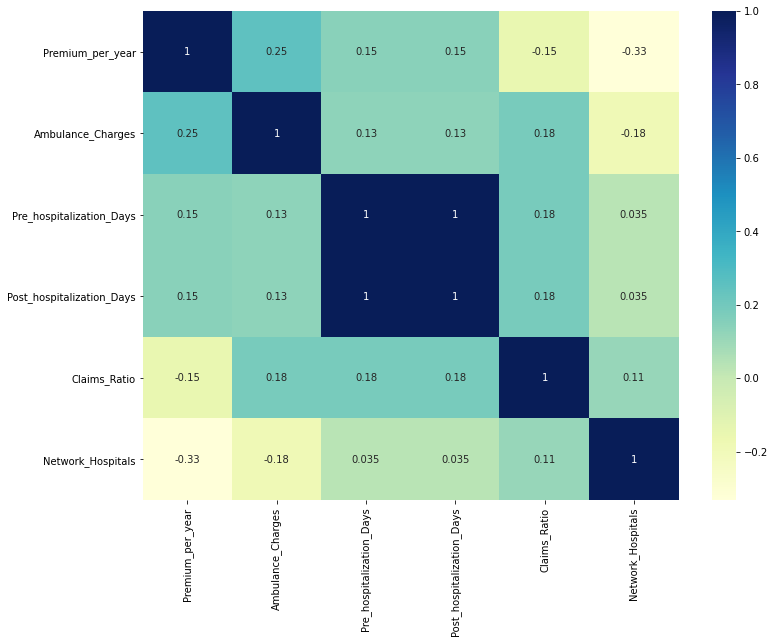

In [ ]:
plt.figure(figsize=(12,9))
corelation = Ghi.corr() 
sns.heatmap(corelation, xticklabels=corelation.columns,
            yticklabels=corelation.columns,cmap="YlGnBu",annot=True)

Pre hospitalization days and post hospitalization days hsving perfect positive corealtion. So we need ro drop either one of them.

### **Dropping Pre hospitalization column**



### **Also Dropping Insurance provider name and name of the product column**

In [ ]:
Group_HI = Ghi.drop(['Pre_hospitalization_Days'],axis=1)

In [ ]:
Group_HI.shape

(39, 14)

## **Histogram**

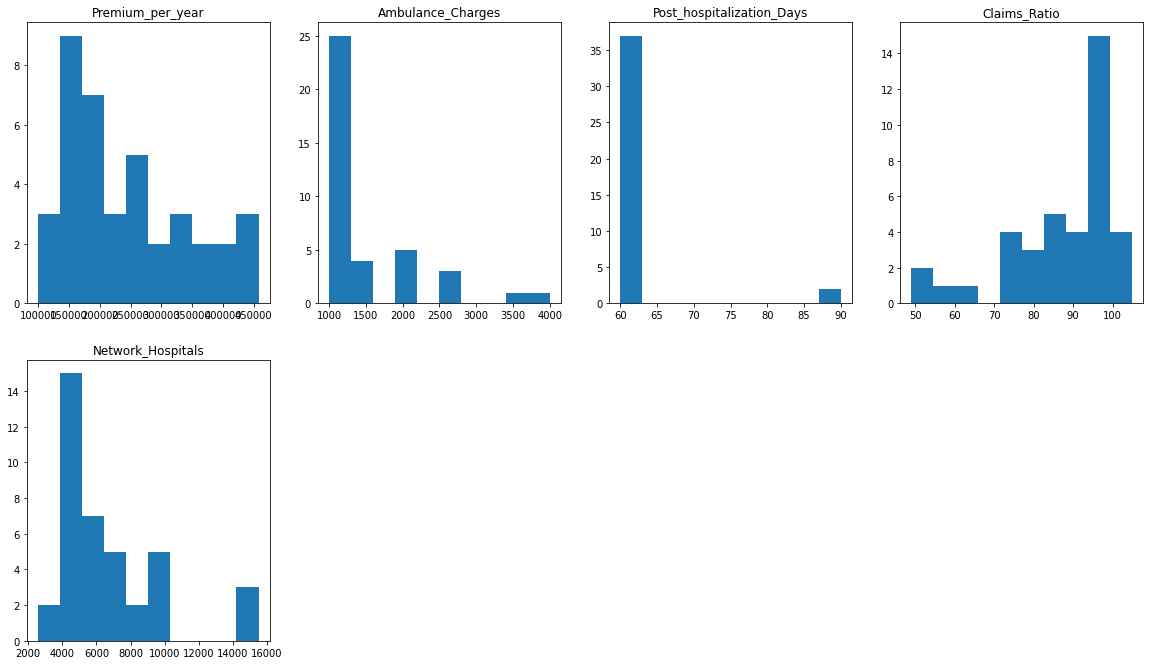

In [ ]:
numeric_columns = Group_HI.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.hist(Group_HI[variable])
                     plt.title(variable)

plt.show()

## **Outlier Detection**

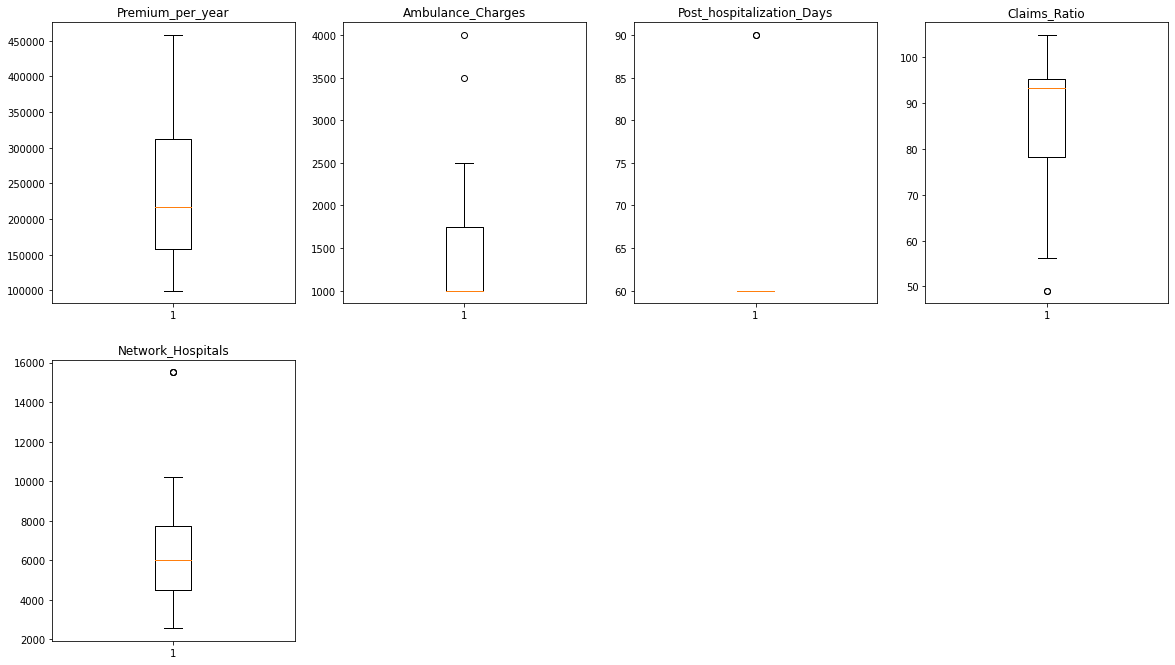

In [ ]:
numeric_columns = Group_HI.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,30))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,4,i+1)
                     plt.boxplot(Group_HI[variable],whis=1.5)
                     plt.title(variable)

plt.show()

**Percentage of outliers in each numerical column**

In [ ]:
# find outlier in all columns
for i in Group_HI.select_dtypes(include=['float64','int64']).columns:
  max_thresold = Group_HI[i].quantile(0.95)
  min_thresold = Group_HI[i].quantile(0.05)
  Group_HI_no_outlier = Group_HI[(Group_HI[i] < max_thresold) & (Group_HI[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((Group_HI.shape[0]-Group_HI_no_outlier[0])/Group_HI.shape[0])*100),"%")

 outlier in  Premium_per_year is 10 %
 outlier in  Ambulance_Charges is 66 %
 outlier in  Post_hospitalization_Days is 100 %
 outlier in  Claims_Ratio is 10 %
 outlier in  Network_Hospitals is 12 %


**We are not removing outlier here as it contains an important information for our modelling.**

## **Label Encoding**

In [ ]:
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
Group_HI['Domiciliary_Hospitalization_Expenses']= label_encoder.fit_transform(Group_HI['Domiciliary_Hospitalization_Expenses'])
Group_HI['Pre_Existing_Disease_Day_1']= label_encoder.fit_transform(Group_HI['Pre_Existing_Disease_Day_1'])
Group_HI['Maternity_Benefits']= label_encoder.fit_transform(Group_HI['Maternity_Benefits'])
Group_HI['Organ_donor_cover']= label_encoder.fit_transform(Group_HI['Organ_donor_cover'])
Group_HI['Ayush']= label_encoder.fit_transform(Group_HI['Ayush'])
Group_HI['Dental']= label_encoder.fit_transform(Group_HI['Dental'])
Group_HI['Newborn_Baby_Cover_Day_1']= label_encoder.fit_transform(Group_HI['Newborn_Baby_Cover_Day_1'])
Group_HI['Covid_19']= label_encoder.fit_transform(Group_HI['Covid_19'])

In [ ]:
Group_HI.shape

(39, 14)

After one hot encoding we have 39 rows and 14 columns

# **Clustering**

In [ ]:
# Importing required libraries
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
Ghi_cluster = Group_HI.iloc[:,1:]
Ghi_cluster.shape

(39, 13)

## **Finding K-Value**

In [ ]:
X=Ghi_cluster.values
wcss=[]
sil=[]
#this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.
for i in range(2,10): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=42 )
     kmeans.fit(X)
     wcss.append(kmeans.inertia_)
     labels=kmeans.labels_
     silhoutte=silhouette_score(Ghi_cluster.values, labels, metric = 'euclidean')
     sil.append(silhoutte)

## **Plotting K-Value & silhoutte Scores**

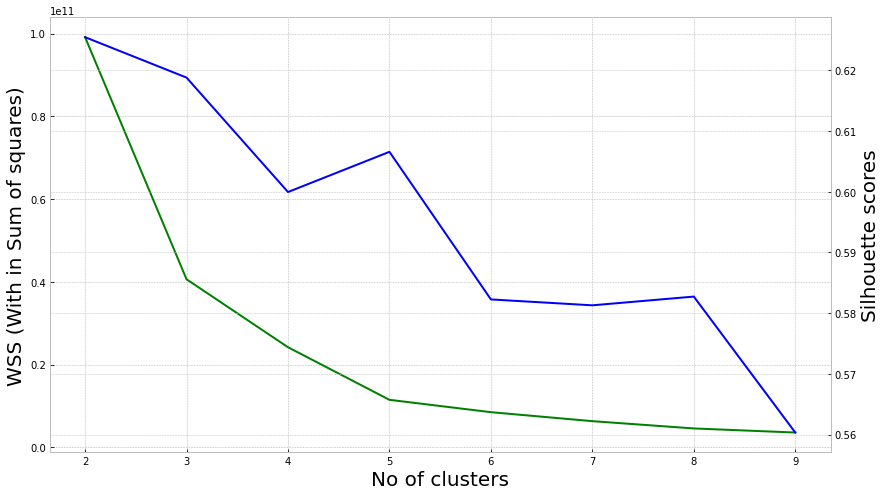

In [ ]:
from matplotlib import style
from matplotlib.ticker import MaxNLocator
k=range(2,10)
style.use("bmh")
fig,ax=plt.subplots(figsize=(14,8))
ax.set_facecolor("white")
ax.plot(k, wcss, color="green")
ax.xaxis.set_major_locator(MaxNLocator(nbins=15, integer=True))
ax.set_xlabel("No of clusters", fontsize=20)
ax.set_ylabel("WSS (With in Sum of squares)", fontsize=20)
ax2=ax.twinx()
ax2.plot(k, sil, color="blue")
ax2.set_ylabel("Silhouette scores", fontsize=20)
ax2.grid(True,color="silver")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, init ='k-means++', max_iter=100, n_init=10,random_state=0 )

In [ ]:
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'bottom left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


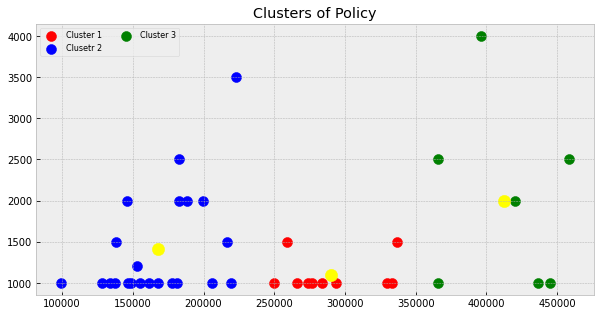

In [ ]:
plt.figure(figsize=(10,5))
c1 = plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red')
c2 = plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue')
c3 = plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label = 'Centroids')
plt.legend((c1,c2,c3),
           ('Cluster 1', 'Clusetr 2', 'Cluster 3'),
           scatterpoints=1,
           loc='bottom left',
           ncol=2,
           fontsize=8)
plt.title('Clusters of Policy')
plt.show()

## **Finding clusters centers & labels**

In [ ]:
kmeans.cluster_centers_
kmeans.labels_

array([2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2,
       2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int32)

In [ ]:
Group_HI_cluster = pd.concat([ghi,pd.DataFrame({'cluster':kmeans.labels_})],axis=1)
Group_HI_cluster.head()

,Provider_product,Insurance_Provider_Name,Name_of_the_Product,Group_Size,Sum_Insured,Premium_per_year,Age_Group,Policy_Term,Ambulance_Charges,Domiciliary_Hospitalization_Expenses,Pre_Existing_Disease_Day_1,Maternity_Benefits,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Organ_donor_cover,Network_Hospitals,Ayush,Dental,Newborn_Baby_Cover_Day_1,Covid_19,cluster
0,Aditya Birla Health Insurance Co Group Assure...,Aditya Birla Health Insurance Co,Group Assure COVID-19,50,200000,365582,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Not Covered,8200,Not Covered,Not Covered,Not Covered,Covered,2
1,Aditya Birla Health Insurance Co Group Arogya...,Aditya Birla Health Insurance Co,Group Arogya Sanjeevani Policy,50,200000,219196,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Covered,8200,Covered,Not Covered,Covered,Not Covered,1
2,Acko General Insurance Co. Ltd. Acko Group He...,Acko General Insurance Co. Ltd.,Acko Group Health Insurance Policy,50,200000,396480,18 - 65,1,4000,Covered,Covered,Not Covered,30,60,95.00,Covered,5000,Not Covered,Not Covered,Covered,Not Covered,2
3,Bajaj Allianz General Insurance Company Limite...,Bajaj Allianz General Insurance Company Limited,Health Guard (Group),50,200000,152673,18 - 65,1,1200,Not Covered,Not Covered,0 - 25000,60,90,99.80,Not Covered,10000,Not Covered,Not Covered,Not Covered,Not Covered,1
4,Bharati AXA Prime Health Insurance,Bharati AXA,Prime Health Insurance,50,200000,222948,18 - 65,1,3500,Covered,Not Covered,Not Covered,30,60,77.50,Covered,4500,Covered,Not Covered,Not Covered,Covered,1


In [ ]:
# Shift column 'cluster' to first position
first_column = Group_HI_cluster.pop('cluster')
  
# insert column to first in data frame 
Group_HI_cluster.insert(0, 'cluster', first_column)

In [ ]:
Group_HI_cluster.head()

,cluster,Provider_product,Insurance_Provider_Name,Name_of_the_Product,Group_Size,Sum_Insured,Premium_per_year,Age_Group,Policy_Term,Ambulance_Charges,Domiciliary_Hospitalization_Expenses,Pre_Existing_Disease_Day_1,Maternity_Benefits,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Organ_donor_cover,Network_Hospitals,Ayush,Dental,Newborn_Baby_Cover_Day_1,Covid_19
0,2,Aditya Birla Health Insurance Co Group Assure...,Aditya Birla Health Insurance Co,Group Assure COVID-19,50,200000,365582,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Not Covered,8200,Not Covered,Not Covered,Not Covered,Covered
1,1,Aditya Birla Health Insurance Co Group Arogya...,Aditya Birla Health Insurance Co,Group Arogya Sanjeevani Policy,50,200000,219196,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Covered,8200,Covered,Not Covered,Covered,Not Covered
2,2,Acko General Insurance Co. Ltd. Acko Group He...,Acko General Insurance Co. Ltd.,Acko Group Health Insurance Policy,50,200000,396480,18 - 65,1,4000,Covered,Covered,Not Covered,30,60,95.00,Covered,5000,Not Covered,Not Covered,Covered,Not Covered
3,1,Bajaj Allianz General Insurance Company Limite...,Bajaj Allianz General Insurance Company Limited,Health Guard (Group),50,200000,152673,18 - 65,1,1200,Not Covered,Not Covered,0 - 25000,60,90,99.80,Not Covered,10000,Not Covered,Not Covered,Not Covered,Not Covered
4,1,Bharati AXA Prime Health Insurance,Bharati AXA,Prime Health Insurance,50,200000,222948,18 - 65,1,3500,Covered,Not Covered,Not Covered,30,60,77.50,Covered,4500,Covered,Not Covered,Not Covered,Covered


In [ ]:
from google.colab import files
Group_HI_cluster.to_csv('K_Means_GHI.csv')
files.download('K_Means_GHI.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Analysis of clusters**

## **Cluster - 1**

In [ ]:
cluster_1_df = Group_HI_cluster[Group_HI_cluster["cluster"]==0]
cluster_1_df

,cluster,Provider_product,Insurance_Provider_Name,Name_of_the_Product,Group_Size,Sum_Insured,Premium_per_year,Age_Group,Policy_Term,Ambulance_Charges,Domiciliary_Hospitalization_Expenses,Pre_Existing_Disease_Day_1,Maternity_Benefits,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Organ_donor_cover,Network_Hospitals,Ayush,Dental,Newborn_Baby_Cover_Day_1,Covid_19
7,0,Care Health Insurance Advanced,Care Health Insurance,Advanced,50,200000,249748,18 - 65,1,1000,Not Covered,Covered,25000 - 50000,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
8,0,Cholamandalam MS General Insurance Co. Ltd. Gr...,Cholamandalam MS General Insurance Co. Ltd.,Group Health Insurance,50,200000,283427,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,56.25,Covered,7240,Covered,Not Covered,Not Covered,Covered
17,0,Kotak Mahindra group health care KOTAK GROUP H...,Kotak Mahindra group health care,KOTAK GROUP HEALTH CARE – MICRO INSURANCE - PO...,50,200000,273925,18 - 65,1,1000,Covered,Covered,Not Covered,30,60,75.45,Covered,4000,Covered,Covered,Not Covered,Not Covered
18,0,Kotak Mahindra group health care Comprehensive...,Kotak Mahindra group health care,Comprehensive premium,50,200000,336541,18 - 65,1,1500,Not Covered,Covered,Not Covered,30,60,75.45,Covered,4000,Covered,Not Covered,Not Covered,Not Covered
25,0,Navi Health Insurance Group Health Insurance,Navi Health Insurance,Group Health Insurance,50,200000,258774,18 - 65,1,1500,Covered,Not Covered,Not Covered,30,60,94.40,Not Covered,4000,Covered,Not Covered,Not Covered,Covered
33,0,State Bank Of India Advanced,State Bank Of India,Advanced,50,200000,293840,18 - 65,1,1000,Not Covered,Covered,25000 - 50000,30,60,96.00,Not Covered,6000,Not Covered,Not Covered,Covered,Not Covered
35,0,The Oriental Insurance Co. Ltd. Mediclaim Insu...,The Oriental Insurance Co. Ltd.,Mediclaim Insurance Policy (Group),50,200000,276488,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,93.96,Covered,5000,Not Covered,Not Covered,Not Covered,Not Covered
36,0,The Oriental Insurance Co. Ltd. Individual Med...,The Oriental Insurance Co. Ltd.,Individual Mediclaim Policy,50,200000,333282,18 - 65,1,1000,Covered,Covered,Not Covered,30,60,93.96,Covered,5000,Covered,Not Covered,Not Covered,Covered
37,0,United India Insurance Company Limited Group H...,United India Insurance Company Limited,Group Health Insurance,50,200000,265896,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,78.03,Not Covered,7000,Not Covered,Covered,Not Covered,Not Covered
38,0,Universal Sompo General Insurance Co. Ltd. Gro...,Universal Sompo General Insurance Co. Ltd.,Group Health Insurance Policy,50,200000,329903,18 - 65,1,1000,Covered,Covered,Not Covered,30,60,76.68,Covered,4000,Covered,Covered,Covered,Covered


Cluster - 1 has 362 rows and 22 columns

## **Cluster - 2**

In [ ]:
cluster_2_df = Group_HI_cluster[Group_HI_cluster["cluster"]==1]
cluster_2_df

,cluster,Provider_product,Insurance_Provider_Name,Name_of_the_Product,Group_Size,Sum_Insured,Premium_per_year,Age_Group,Policy_Term,Ambulance_Charges,Domiciliary_Hospitalization_Expenses,Pre_Existing_Disease_Day_1,Maternity_Benefits,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Organ_donor_cover,Network_Hospitals,Ayush,Dental,Newborn_Baby_Cover_Day_1,Covid_19
1,1,Aditya Birla Health Insurance Co Group Arogya...,Aditya Birla Health Insurance Co,Group Arogya Sanjeevani Policy,50,200000,219196,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Covered,8200,Covered,Not Covered,Covered,Not Covered
3,1,Bajaj Allianz General Insurance Company Limite...,Bajaj Allianz General Insurance Company Limited,Health Guard (Group),50,200000,152673,18 - 65,1,1200,Not Covered,Not Covered,0 - 25000,60,90,99.80,Not Covered,10000,Not Covered,Not Covered,Not Covered,Not Covered
4,1,Bharati AXA Prime Health Insurance,Bharati AXA,Prime Health Insurance,50,200000,222948,18 - 65,1,3500,Covered,Not Covered,Not Covered,30,60,77.50,Covered,4500,Covered,Not Covered,Not Covered,Covered
5,1,Care Health Insurance Basic,Care Health Insurance,Basic,50,200000,99469,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
6,1,Care Health Insurance Standard,Care Health Insurance,Standard,50,200000,148666,18 - 65,1,1000,Not Covered,Covered,Not Covered,30,60,95.20,Not Covered,15500,Not Covered,Not Covered,Covered,Not Covered
9,1,CitiBank & The New India Assurance Co. Ltd Goo...,CitiBank & The New India Assurance Co. Ltd,Good Health Insurance,50,200000,138287,18 - 65,1,1500,Not Covered,Not Covered,Not Covered,30,60,91.99,Not Covered,4000,Covered,Not Covered,Not Covered,Not Covered
10,1,Edelweiss General Insurance Co.Ltd Edelweiss G...,Edelweiss General Insurance Co.Ltd,Edelweiss Group Total Protect Policy,50,200000,216648,18 - 65,1,1500,Covered,Covered,Not Covered,30,60,85.57,Covered,2578,Covered,Covered,Covered,Covered
12,1,Godigit Group Health insurance,Godigit,Group Health insurance,50,200000,146333,18 - 65,1,1000,Covered,Covered,0 - 25000,30,60,93.37,Covered,5900,Not Covered,Not Covered,Covered,Not Covered
13,1,HDFC ERGO General Insurance Group Mediclaim In...,HDFC ERGO General Insurance,Group Mediclaim Insurance,50,200000,134151,18 - 65,1,1000,Not Covered,Not Covered,0 - 25000,30,60,99.80,Not Covered,10000,Covered,Not Covered,Not Covered,Not Covered
14,1,ICICI LOMBARD ICICI LOMBARD (floater),ICICI LOMBARD,ICICI LOMBARD (floater),50,200000,177933,18 - 65,1,1000,Covered,Covered,25000 - 50000,30,60,78.32,Covered,6500,Not Covered,Not Covered,Covered,Not Covered


Cluster - 2 has 770 rows and 22 columns

## **Cluster - 3**

In [ ]:
cluster_3_df = Group_HI_cluster[Group_HI_cluster["cluster"]==2]
cluster_3_df

,cluster,Provider_product,Insurance_Provider_Name,Name_of_the_Product,Group_Size,Sum_Insured,Premium_per_year,Age_Group,Policy_Term,Ambulance_Charges,Domiciliary_Hospitalization_Expenses,Pre_Existing_Disease_Day_1,Maternity_Benefits,Pre_hospitalization_Days,Post_hospitalization_Days,Claims_Ratio,Organ_donor_cover,Network_Hospitals,Ayush,Dental,Newborn_Baby_Cover_Day_1,Covid_19
0,2,Aditya Birla Health Insurance Co Group Assure...,Aditya Birla Health Insurance Co,Group Assure COVID-19,50,200000,365582,18 - 65,1,1000,Covered,Not Covered,Not Covered,30,60,49.08,Not Covered,8200,Not Covered,Not Covered,Not Covered,Covered
2,2,Acko General Insurance Co. Ltd. Acko Group He...,Acko General Insurance Co. Ltd.,Acko Group Health Insurance Policy,50,200000,396480,18 - 65,1,4000,Covered,Covered,Not Covered,30,60,95.00,Covered,5000,Not Covered,Not Covered,Covered,Not Covered
11,2,Future Generali Health Insurance GROUP HEALTH ...,Future Generali Health Insurance,GROUP HEALTH INSURANCE (Revised),50,200000,444935,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,82.96,Not Covered,5100,Covered,Not Covered,Covered,Not Covered
20,2,Magma HDI General Insurance Co. Ltd. Support ...,Magma HDI General Insurance Co. Ltd.,Support health insurance plan,50,200000,366093,18 - 65,1,2500,Not Covered,Not Covered,Not Covered,30,60,95.00,Covered,4500,Covered,Not Covered,Not Covered,Not Covered
21,2,Magma HDI General Insurance Co. Ltd. secure he...,Magma HDI General Insurance Co. Ltd.,secure health insurance plan,50,200000,420467,18 - 65,1,2000,Not Covered,Covered,Not Covered,30,60,95.00,Covered,4500,Covered,Not Covered,Not Covered,Covered
22,2,Magma HDI General Insurance Co. Ltd. support P...,Magma HDI General Insurance Co. Ltd.,support Plus health insurance plan,50,200000,458076,18 - 65,1,2500,Covered,Not Covered,0 - 25000,60,90,95.00,Covered,4500,Covered,Not Covered,Covered,Covered
23,2,Manipal Cigna Health Insurance Company Limited...,Manipal Cigna Health Insurance Company Limited,Manipalcigna prohealth group insurance,50,200000,436652,18 - 65,1,1000,Not Covered,Not Covered,Not Covered,30,60,91.00,Covered,7000,Covered,Not Covered,Not Covered,Covered


Cluster - 3 has 47 rows and 22 columns

# **Modelling**

## **Recommendation Engine**

In [ ]:
cluster_1_df = Group_HI_cluster[Group_HI_cluster["cluster"]==0]
cs1 = cluster_1_df[['Provider_product','Premium_per_year']]
cs1.reset_index(drop=True, inplace=True)

cluster_2_df = Group_HI_cluster[Group_HI_cluster["cluster"]==1]
cs2 = cluster_2_df[['Provider_product','Premium_per_year']]
cs2.reset_index(drop=True, inplace=True)

cluster_3_df = Group_HI_cluster[Group_HI_cluster["cluster"]==2]
cs3 = cluster_3_df[['Provider_product','Premium_per_year']]
cs3.reset_index(drop=True, inplace=True)

In [ ]:
#importing vectorize function
from sklearn.feature_extraction.text import TfidfVectorizer 

# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 

# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrix = tfidf.fit_transform(cs2.Provider_product)
tfidf_matrix.shape # (22,37)

#Importing linear kernel
from sklearn.metrics.pairwise import linear_kernel

# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

# creating a mapping of ent name to index number 
policy_index = pd.Series(cs2.index, index = cs2['Provider_product']).drop_duplicates()

policy_id = policy_index["HDFC ERGO General Insurance Group Mediclaim Insurance"]
policy_id

def get_recommendations(Name, topN):    
    # topN = 10
    # Getting the movie  category index using its title 
    policy_id = policy_index[Name]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[policy_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    # Getting the movie category index 
    ent_idx  =  [i[0] for i in cosine_scores_N]
    ent_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar movies category and scores
    policy_similar_category = pd.DataFrame(columns=["Provider_product", "Score"])
    policy_similar_category["Insurance_Provider_Name"] = cs2.loc[ent_idx, "Provider_product"]
    policy_similar_category["Score"] = ent_scores
    policy_similar_category.reset_index(inplace = True)  
    # ent_similar_category.drop(["index"], axis=1, inplace=True)
   
    print (policy_similar_category)
    # return (ent_similar_category)

In [ ]:
# Enter your category and number of categories to be recommended 
recommendation = get_recommendations("The Oriental Insurance Co. Ltd. Group Medical Insaurance(Sliver Plan)", topN = 3)
recommendation 

   index  ...                            Insurance_Provider_Name
0     21  ...  The Oriental Insurance Co. Ltd. Group Medical ...
1     11  ...  Indian Medical Insurance policy Group Health I...
2      7  ...                     Godigit Group Health insurance
3     15  ...  Royal Sundaram General Insurance Co. Ltd. Grou...

[4 rows x 4 columns]


""


In [ ]:
recommendation = get_recommendations("Care Health Insurance Basic", topN = 3)
recommendation 

   index  ...                            Insurance_Provider_Name
0      3  ...                        Care Health Insurance Basic
1      4  ...                     Care Health Insurance Standard
2     19  ...                          State Bank Of India Basic
3     17  ...  Star Health and Allied Insurance Co. Ltd. Clas...

[4 rows x 4 columns]


In [ ]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("recommendation.pkl","wb")
pickle.dump(recommendation, pickle_out)
pickle_out.close()